In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import sklearn
from sklearn.datasets import fetch_mldata

#### Load the MNIST original dataset

    Datasets have a 
        DESCR key    : Describes the dataset
        'data' key   : Array with one row per instance and one column per feature
        'target' key : Containing an array with the labels

In [73]:
mnist = fetch_mldata('MNIST original')

mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [74]:
#Assign X to be an array containing the "data" in mnist dataset
# Assign y to be an array with the "target" labels 
X, y = mnist["data"], mnist["target"]

print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (70000, 784)
Shape of y:  (70000,)


##### From the shape we can infer 
X contains 70,000 images, each with 784 pixels in it.

##### Additional Info 
    Each pixel has brightness on greyscale of 784 pixels ( 28x28 pixels).
        x = 0 => white
        x = 255 => black
    y has the actual label of the digit 0..9'''

#### Lets look at few of the images

Image number 3000 is labeled 0 


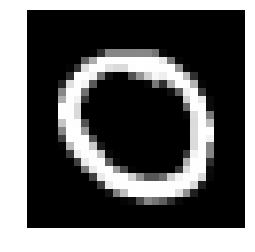

Image number 10000 is labeled 1 


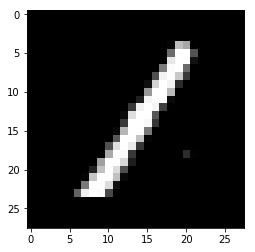

Image number 17000 is labeled 2 


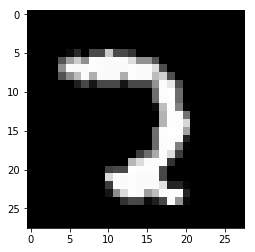

Image number 24000 is labeled 3 


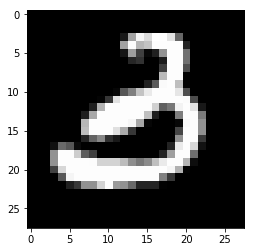

Image number 31000 is labeled 5 


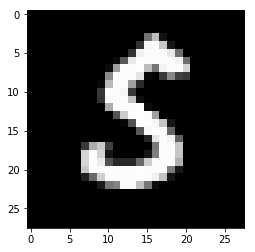

Image number 38000 is labeled 6 


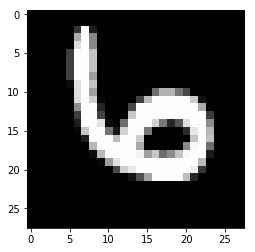

Image number 45000 is labeled 7 


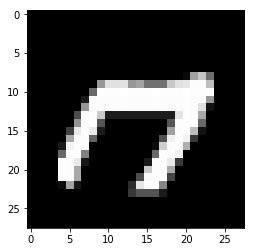

Image number 52000 is labeled 8 


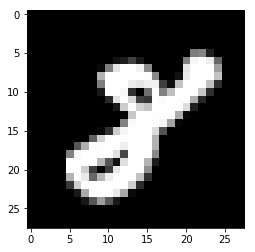

Image number 59000 is labeled 9 


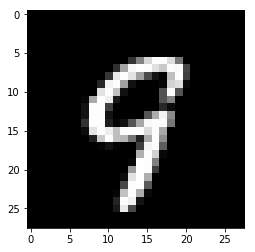

Image number 66000 is labeled 5 


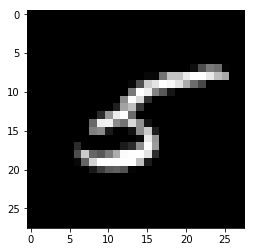

In [108]:

few_locations = np.arange(3000,70000, 7000) # range of locations starting at 3000 in steps of 7000

plt.axis("off")

for i in few_locations:
    print("Image number %d is labeled %d " % (i, y[i] ) )
    some_digit = X[i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = plt.cm.gray)
    plt.show()


#### Split the data into train_data and test_data

In [88]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

#### Lets do simple detection of only 1 digit : "5" or "not 5"

In [77]:
#Target vector for detecting "5"
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [78]:
y_train_5.shape

(60000,)

#### Choose the model and Train it
This may take a few minutes ( fitting 60,000 images with 784 pixels each )

In [82]:
import time

#### Choose the model
from sklearn.linear_model import LogisticRegression
model = sklearn.linear_model.LogisticRegression()

tic = time.time()  # Current time in microseconds, before training started

#Train the model
model.fit(X_train, y_train_5)

toc = time.time() # Current time in microseconds, after training ended

print("My computer took %d seconds to train MNIST images" % (toc-tic))

My computer took -169 seconds to train MNIST images


array([ True], dtype=bool)

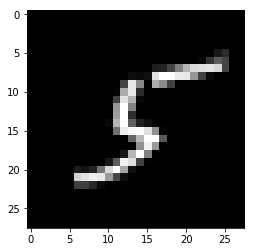

In [83]:
#Lets pick a digit and look at its prediction
some_digit = X_train[35000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = plt.cm.gray)
model.predict([some_digit])

In [87]:
X_test.shape


(784,)

In [89]:
#Score the model
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

3000 False


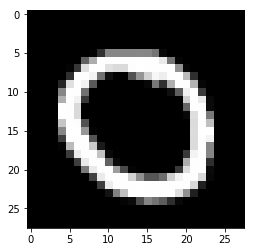

10000 False


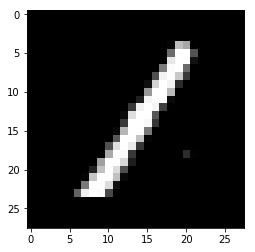

17000 False


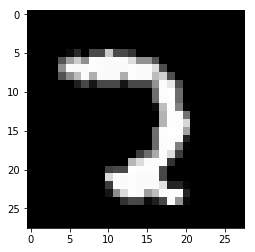

24000 False


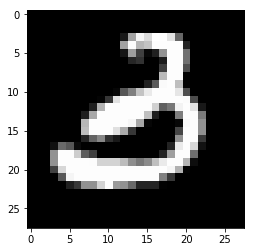

31000 True


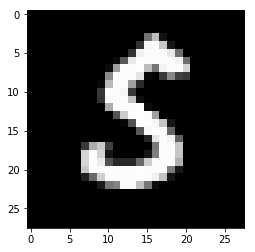

38000 False


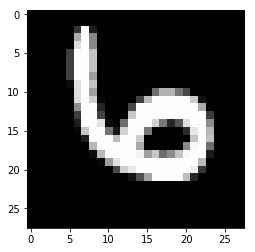

45000 False


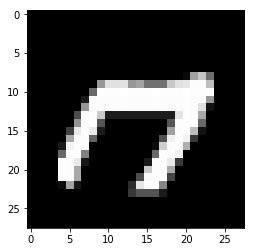

52000 False


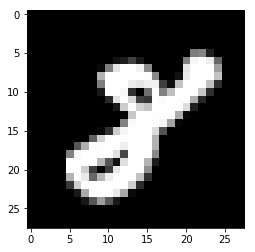

59000 False


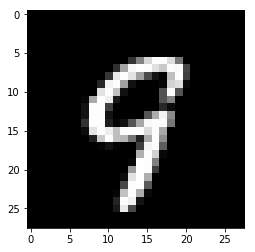

66000 True


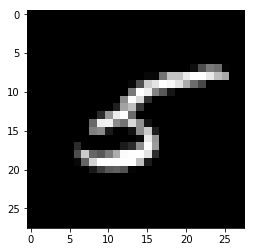

In [16]:
for i in few_locations:
    print(i, y_train_predicted[i])
    some_digit = X[i]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = plt.cm.gray)
    plt.show()

#### Classification Metrics for Training Data

In [99]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import  precision_score, recall_score

print("Confusion Matrix :  \n",
      confusion_matrix(y_train_5, y_train_predicted, labels = [1, 0] )) # why is labels required? Try it without the labels setting, you will know 

print("Precision :", precision_score(y_train_5,y_train_predicted))

print("Recall : ", recall_score(y_train_5,y_train_predicted))

print("F1_Score : ", f1_score(y_train_5,y_train_predicted))

Confusion Matrix :  
 [[ 4544   877]
 [  426 54153]]
Precision : 0.914285714286
Recall :  0.838221730308
F1_Score :  0.874603021846


In [92]:
#### Classification Metrics for Test Data

In [107]:
print("Confusion Matrix :  \n",  
      confusion_matrix(y_test_5, y_test_predicted, labels = [1, 0]))

print("Precision :", precision_score(y_test_5,y_test_predicted))

print("Recall :", recall_score(y_test_5,y_test_predicted))

print("F1_Score : ", f1_score(y_test_5,y_test_predicted))

Confusion Matrix :  
 [[ 747  145]
 [  83 9025]]
Precision : 0.9
Recall : 0.837443946188
F1_Score :  0.867595818815
